## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df_mouse_study = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
# Display the data table for preview
df_mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
df_mouse_study["Mouse ID"].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = df_mouse_study.loc[df_mouse_study.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

In [30]:
# Optional: Get all the data for the duplicate mouse ID. 
df_mouse_study.loc[df_mouse_study["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [18]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_mouse_clean = df_mouse_study[df_mouse_study['Mouse ID'].isin(duplicate_mice)==False]


In [19]:
# Checking the number of mice in the clean DataFrame.
#df_mouse_clean.loc[df_mouse_clean["Mouse ID"] == "g989"]
df_mouse_clean["Mouse ID"].nunique()

248

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_mean = df_mouse_clean.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tumor_median = df_mouse_clean.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tumor_std = df_mouse_clean.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tumor_sem = df_mouse_clean.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
drug_regimen = df_mouse_clean["Drug Regimen"]

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
df_tumor_summary = pd.DataFrame({"Tumor Mean": tumor_mean, 
                                 "Tumor Median": tumor_median,
                                "Tumor Std Dev": tumor_std, "Tumor SEM": tumor_sem})
df_tumor_summary

,Tumor Mean,Tumor Median,Tumor Std Dev,Tumor SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


## Bar and Pie Charts

In [87]:
test_count = df_mouse_clean["Drug Regimen"].value_counts()
df_test_counts = pd.DataFrame(test_count).reset_index()
df_test_counts = df_test_counts.rename(columns={"index": "Drug", "Drug Regimen": "Test Count"})
df_test_counts

,Drug,Test Count
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Placebo,181
6,Stelasyn,181
7,Infubinol,178
8,Ceftamin,178
9,Propriva,148


In [90]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
test_counts = df_test_counts.set_index("Drug")

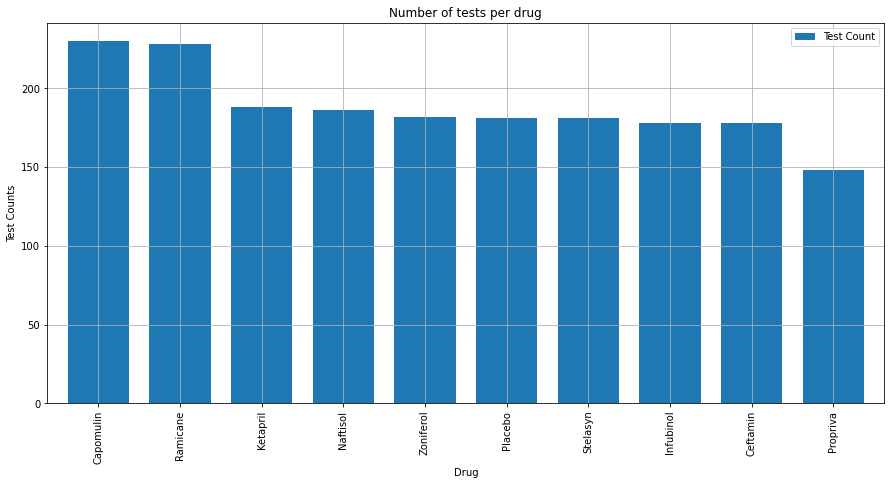

In [114]:
fig, ax=plt.subplots(figsize=(15,7))
test_counts.plot(kind='bar', ax=ax, width = .75);
ax.grid()
ax.set(xlabel="Drug",
       ylabel="Test Counts",
       title="Number of tests per drug"
      );

In [95]:
#Generate the variables for the plot
x_axis = df_test_counts["Drug"]
y_axis = df_test_counts["Test Count"]

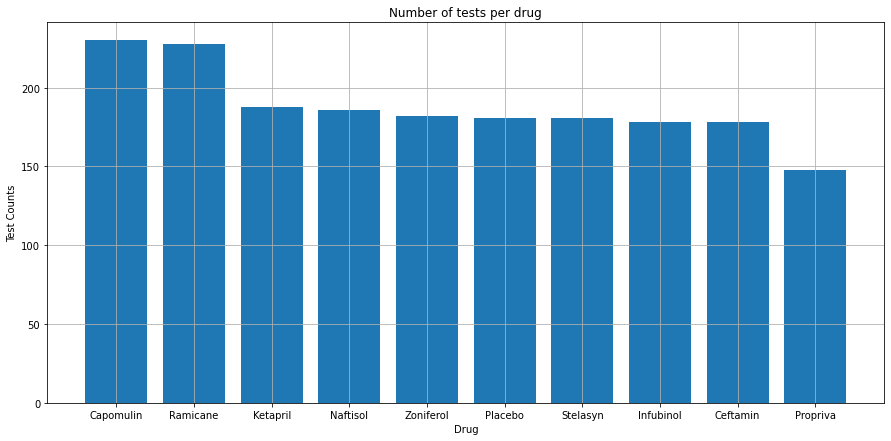

In [113]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# Create a bar chart based upon the above data
fig, ax = plt.subplots(figsize = (15,7));
ax.grid();
ax.bar(x_axis, y_axis);
ax.set(xlabel= "Drug",
      ylabel = "Test Counts",
      title = "Number of tests per drug");

In [170]:
mouse_genders = df_mouse_clean["Sex"].value_counts()
my_colors= ['lightblue', 'silver']
explode = (0,.1)

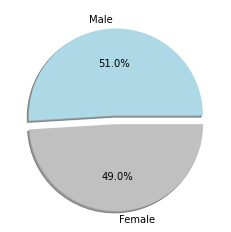

In [171]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
fig3, ax3 = plt.subplots()
ax3.pie(mouse_genders, labels=labels, colors=my_colors, explode=explode, shadow= True, autopct='%1.1f%%');

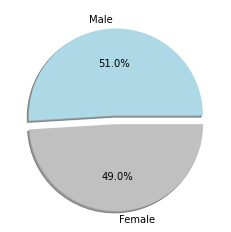

In [172]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_genders, labels=labels, colors = my_colors, explode = explode, shadow = True, autopct='%1.1f%%');

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
